<a href="https://colab.research.google.com/github/NehaGupta-DataScientists/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Import all libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
# For Model Building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sn


In [4]:
#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import the data 
bike = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

**Data Inspection**

In [8]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
bike.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**No. Of columns**

In [11]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
bike.shape

(8760, 14)

In [13]:
bike.size

122640

In [14]:
# To find statistical values
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [15]:
bike.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [16]:
bike.Seasons.describe()

count       8760
unique         4
top       Spring
freq        2208
Name: Seasons, dtype: object

In [17]:
bike.Date.describe()

count           8760
unique           365
top       01/12/2017
freq              24
Name: Date, dtype: object

In [18]:
bike.Holiday.describe()

count           8760
unique             2
top       No Holiday
freq            8328
Name: Holiday, dtype: object

In [19]:
# duplicate
len(bike[bike.duplicated()])

0

In [20]:
# checking Null values 
bike.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [21]:
# Rename all the columns 
bike=bike.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [22]:
# Aftr Renaming all the columns 
bike.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [23]:
bike.Functioning_Day.describe()

count     8760
unique       2
top        Yes
freq      8465
Name: Functioning_Day, dtype: object

In [24]:
bike.Rented_Bike_Count.describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented_Bike_Count, dtype: float64

In [ ]:
# data distribution  

"""import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(x='Seasons', bike = bike) 
plt.show()

sns.countplot(x='Date', bike = bike) 
plt.show()

sns.countplot(x='Rented_Bike_Count', bike =bike) 
plt.show()

sns.countplot(x='Holiday', bike = bike) 
plt.show()

sns.countplot(x='Functioning_Day', bike =bike) 
plt.show()

sns.countplot(x='Rainfall', bike =bike) 
plt.show()

sns.countplot(x='Snowfall', bike =bike) 
plt.show()


sns.histplot(bike['Humidity'],  kde=False)
plt.show()

sns.histplot(bike['Temperatue'], kde= False)
plt.show()

sns.histplot(bike['Dew_point_temperature'], kde=False)
plt.show()

sns.histplot(bike['wWind_speed'], kde=False)
plt.show()

sns.histplot(bike['Solar_Radiation'], kde=False)
plt.show()

sns.histplot(bike['Hour'], kde=False)
plt.show()

sns.histplot(bike['Visibility'], kde=False)
plt.show()"""

"import seaborn as sns \nimport matplotlib.pyplot as plt\n\nsns.countplot(x='Seasons', bike = bike) \nplt.show()\n\nsns.countplot(x='Date', bike = bike) \nplt.show()\n\nsns.countplot(x='Rented_Bike_Count', bike =bike) \nplt.show()\n\nsns.countplot(x='Holiday', bike = bike) \nplt.show()\n\nsns.countplot(x='Functioning_Day', bike =bike) \nplt.show()\n\nsns.countplot(x='Rainfall', bike =bike) \nplt.show()\n\nsns.countplot(x='Snowfall', bike =bike) \nplt.show()\n\n\nsns.histplot(bike['Humidity'],  kde=False)\nplt.show()\n\nsns.histplot(bike['Temperatue'], kde= False)\nplt.show()\n\nsns.histplot(bike['Dew_point_temperature'], kde=False)\nplt.show()\n\nsns.histplot(bike['wWind_speed'], kde=False)\nplt.show()\n\nsns.histplot(bike['Solar_Radiation'], kde=False)\nplt.show()\n\nsns.histplot(bike['Hour'], kde=False)\nplt.show()\n\nsns.histplot(bike['Visibility'], kde=False)\nplt.show()"

In [25]:
from datetime import datetime
import datetime as dt

In [26]:
# splitting "Date" column into three other columns like "year","month","day".
bike['Date']= bike['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [27]:
bike['year']= bike['Date'].dt.year
bike['month'] =bike['Date'].dt.month
bike['day']=bike['Date'].dt.day_name()

In [28]:
bike['Rented_Bike_Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

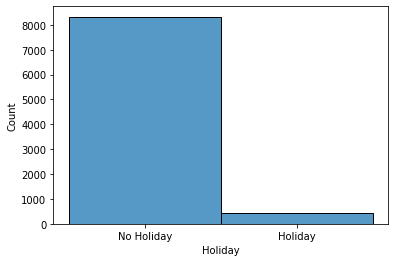

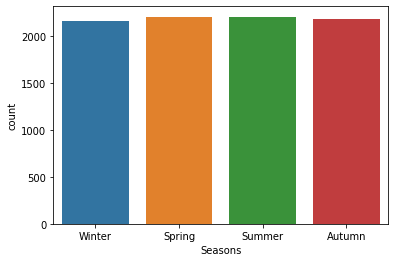

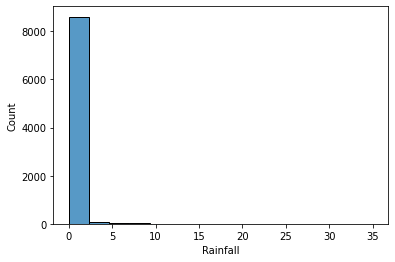

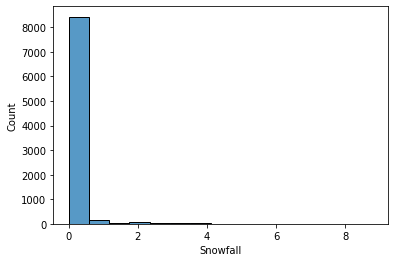

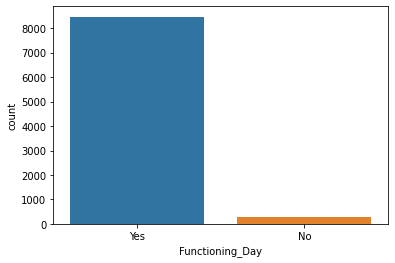

In [29]:
sns.histplot(x= bike['Holiday'])
plt.show()

sns.countplot(x= bike['Seasons']) 
plt.show()

#sns.countplot(x=bike['Date']) 
##plt.show()

sns.histplot(x=bike['Rainfall']) 
plt.show()

sns.histplot(x=bike['Snowfall']) 
plt.show()

sns.countplot(x=bike['Functioning_Day']) 
plt.show()

# **Explodatory Data Analysis**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

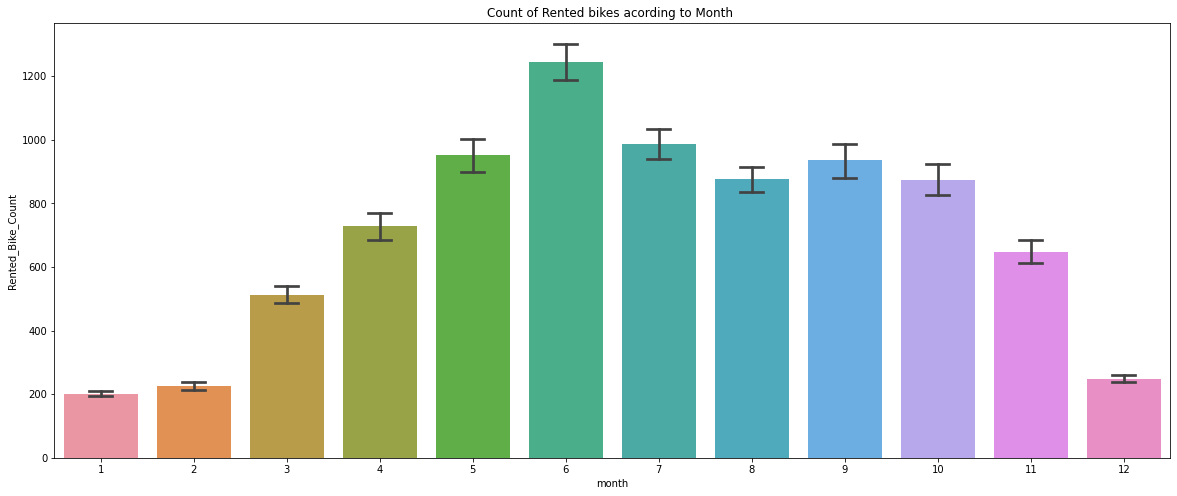

In [30]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

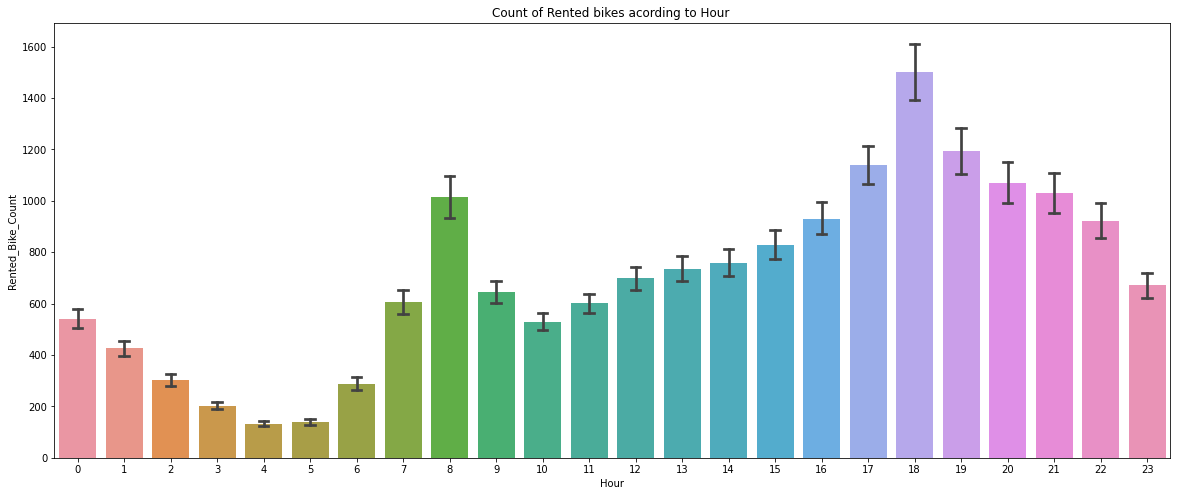

In [31]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

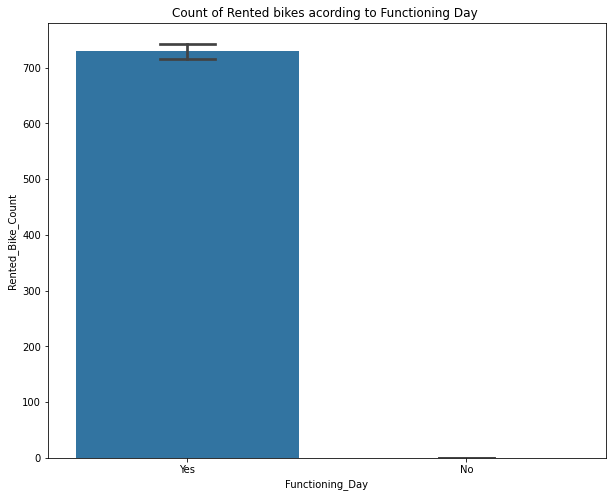

In [32]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike,y='Rented_Bike_Count',x='Functioning_Day',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

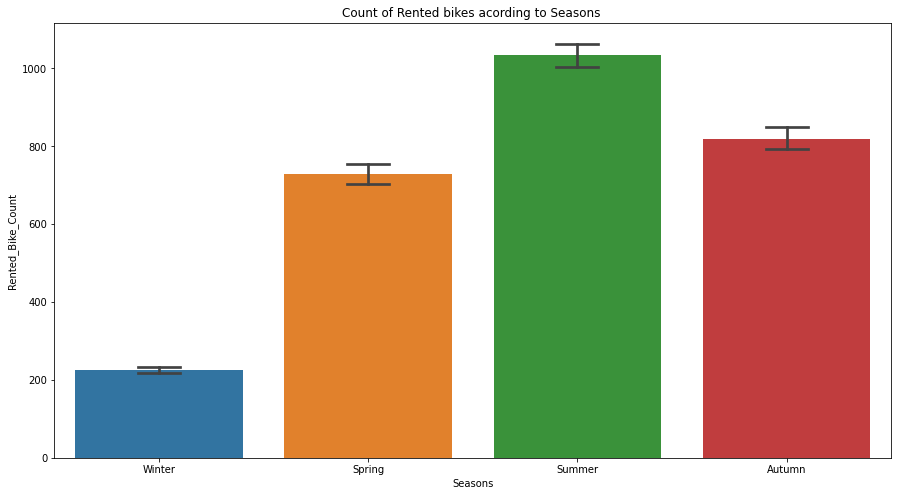

In [33]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike,y='Rented_Bike_Count',x='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

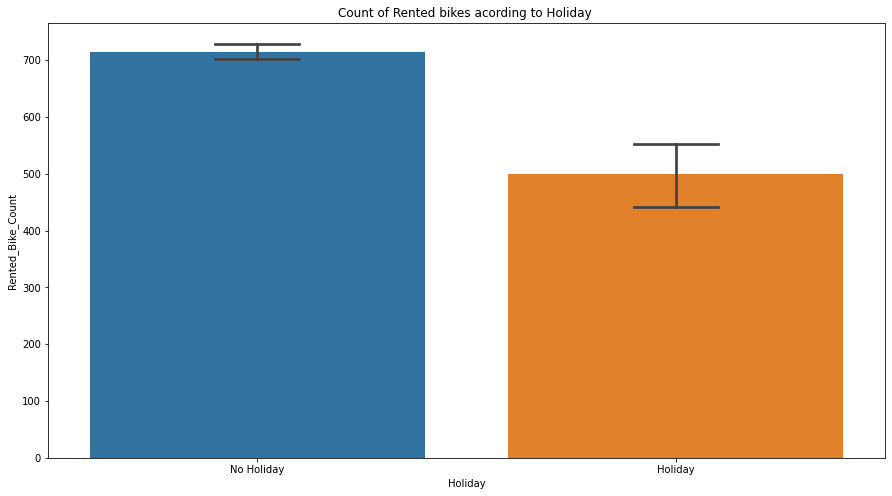

In [34]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=bike,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [35]:
numerical_columns=list(bike.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month'],
      dtype='object')

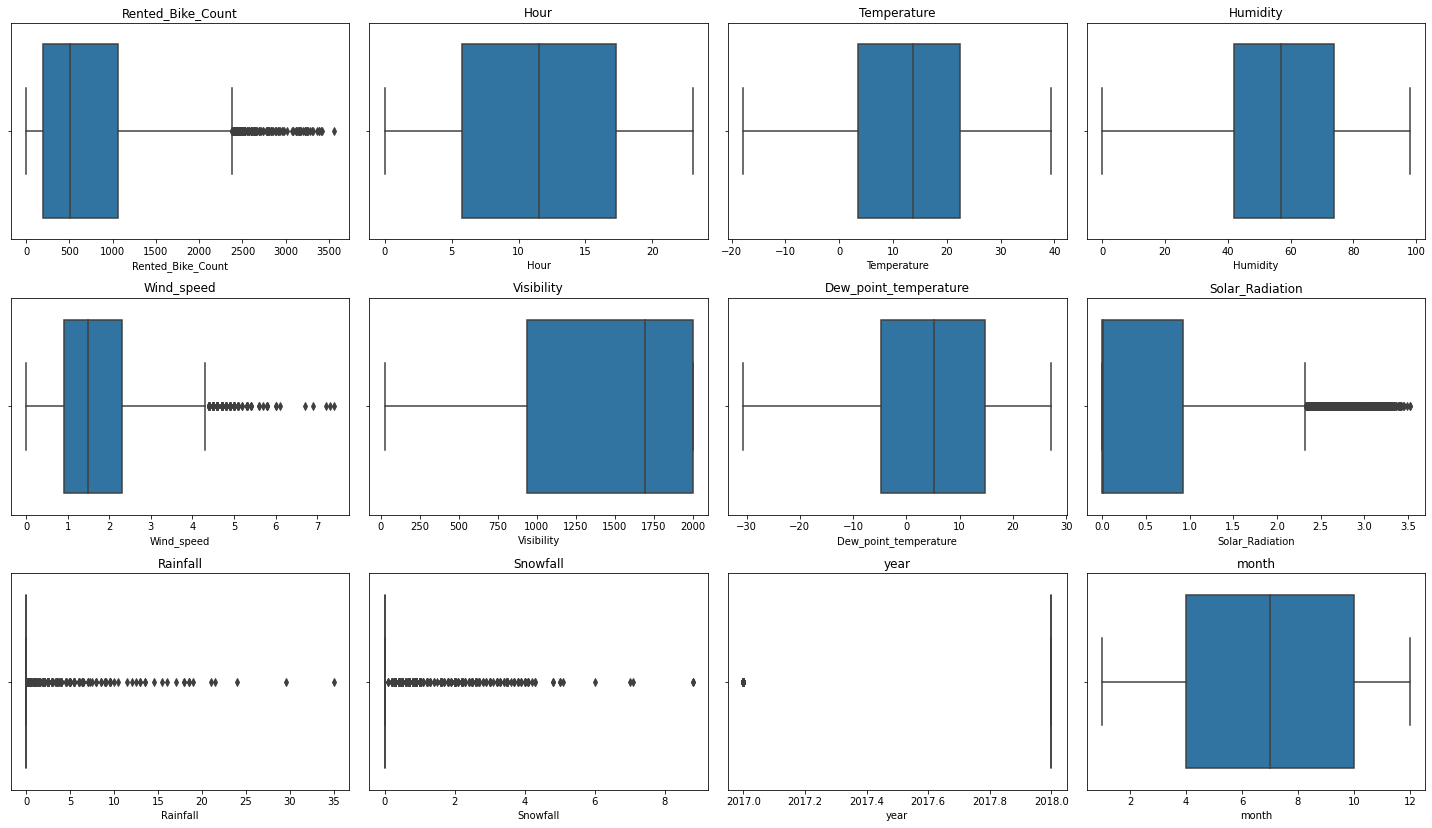

In [36]:
n = 1
plt.figure(figsize=(20,15))

for col in numerical_features:
  plt.subplot(4,4,n)
  n=n+1
  sns.boxplot(x=bike[col])
  plt.title(col)
  plt.tight_layout()

In [38]:
bike.loc[bike['Rainfall']>=2,'Rainfall']= 2
bike.loc[bike['Solar_Radiation']>=2,'Solar_Radiation']= 2
bike.loc[bike['Snowfall']>=1.5,'Snowfall']= 1.5
bike.loc[bike['Wind_speed']>=4,'Wind_speed']= 4

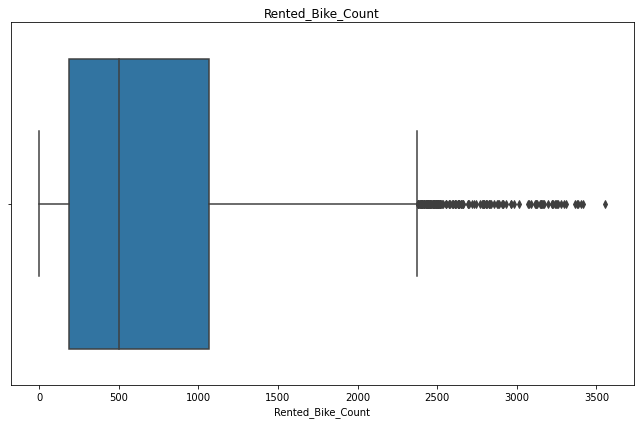

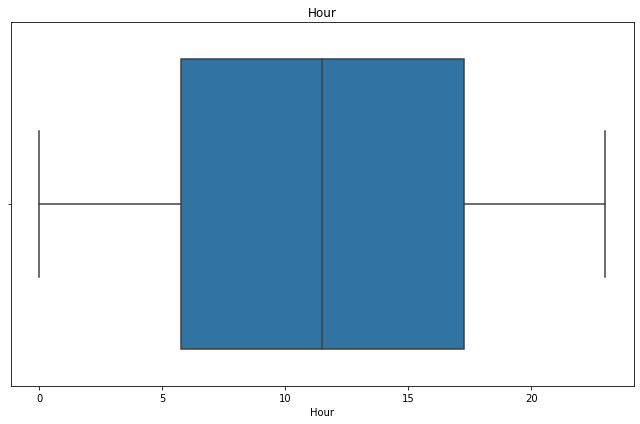

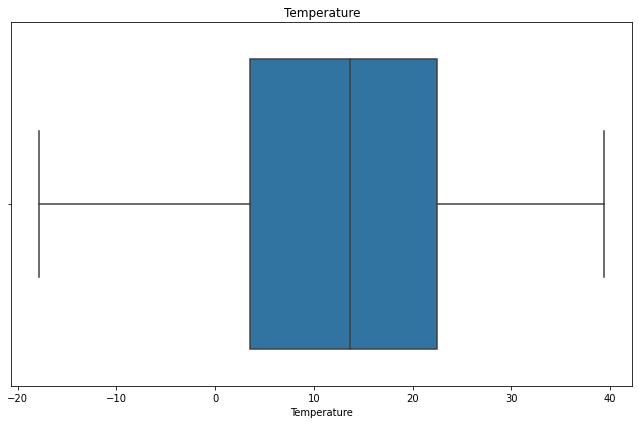

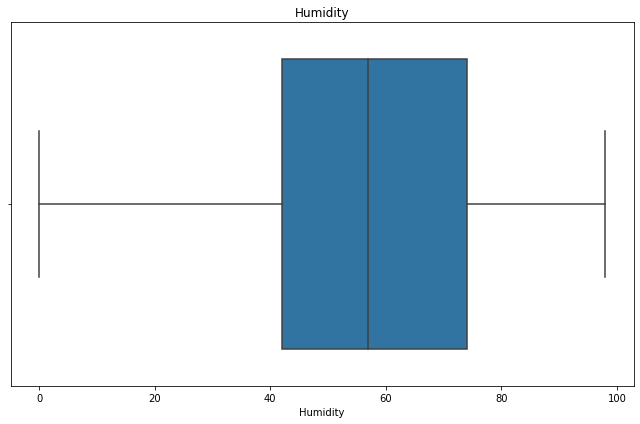

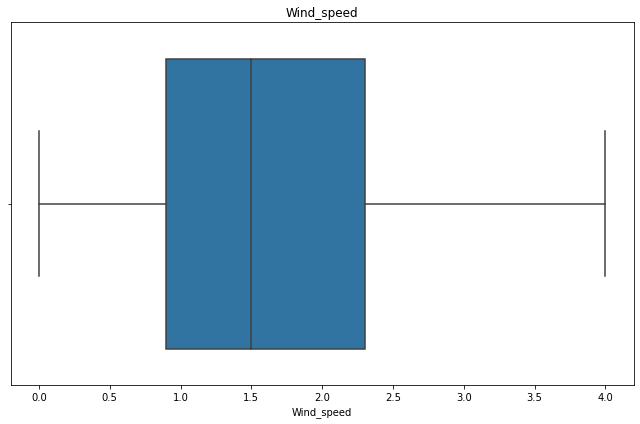

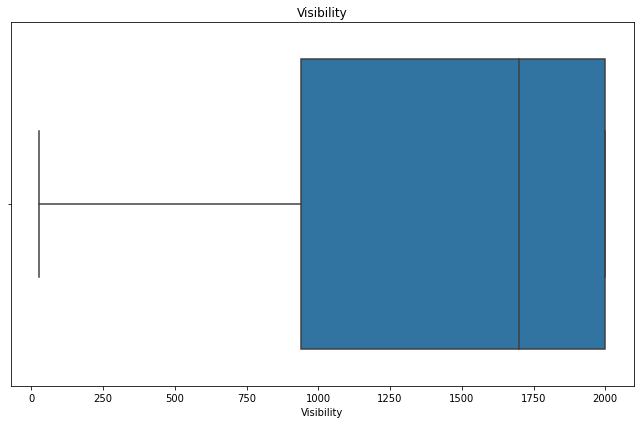

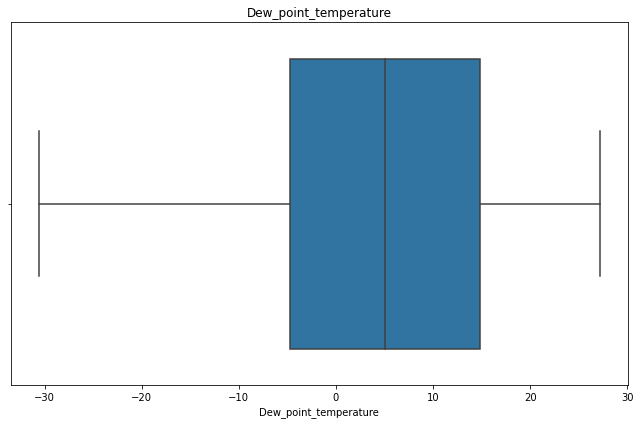

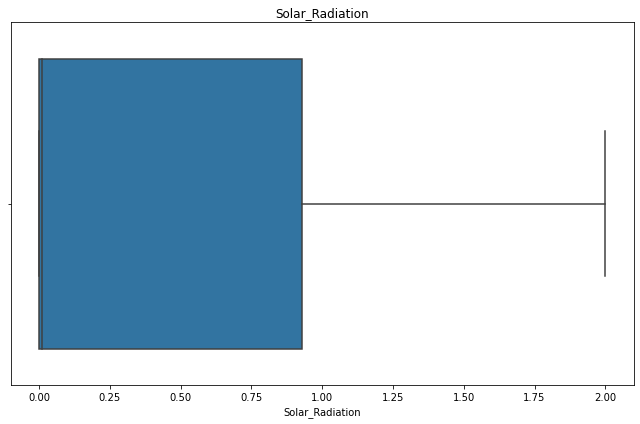

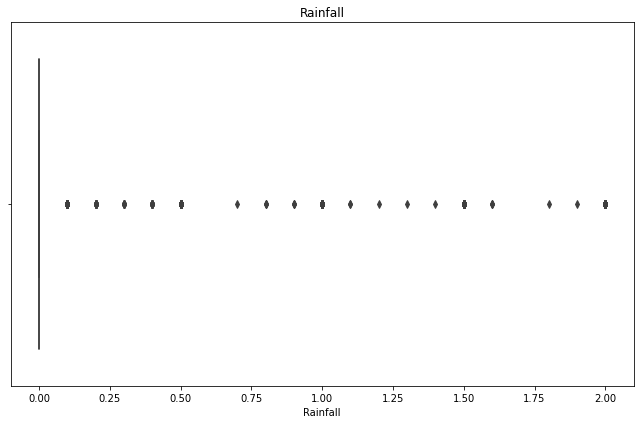

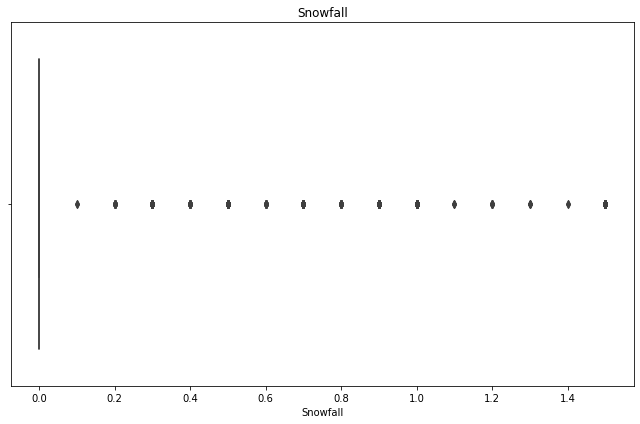

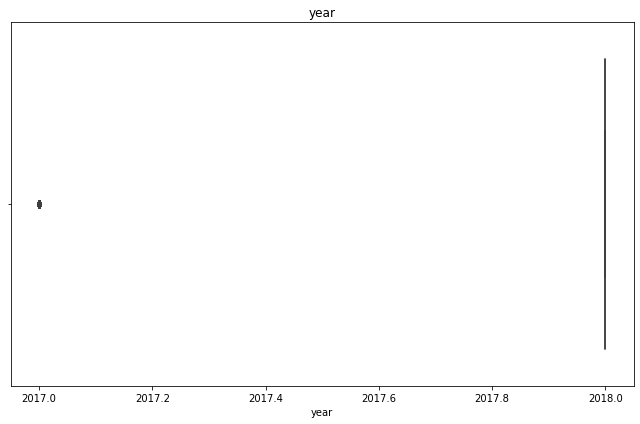

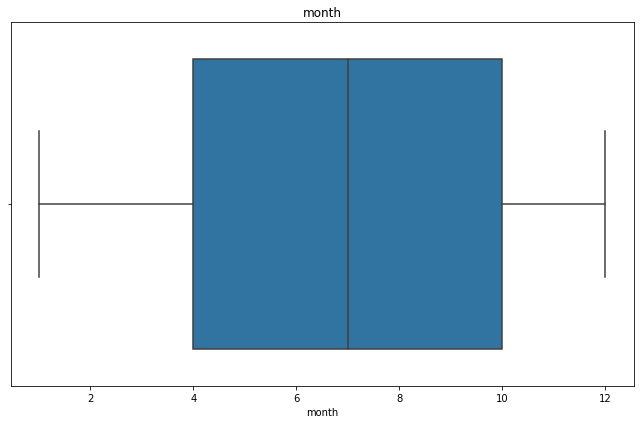

In [39]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=bike[col])
  
  plt.title(col)
  plt.tight_layout()
  
plt.show()

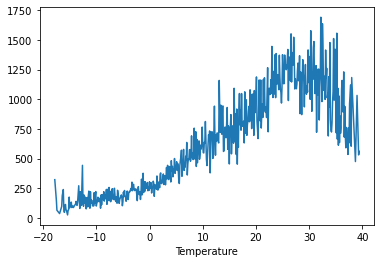

In [40]:
bike.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

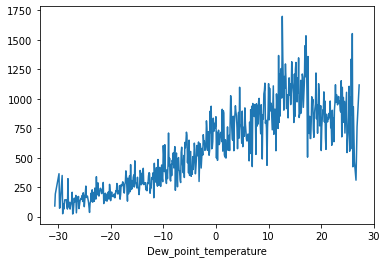

In [43]:
bike.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

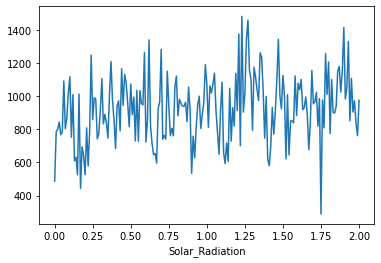

In [44]:
bike.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

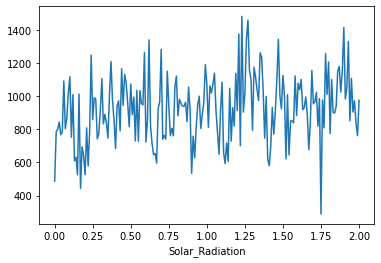

In [45]:
bike.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

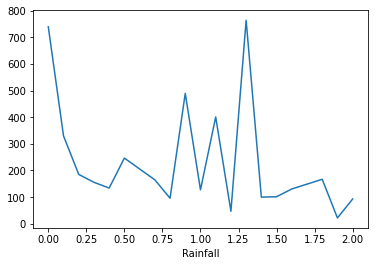

In [46]:
bike.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

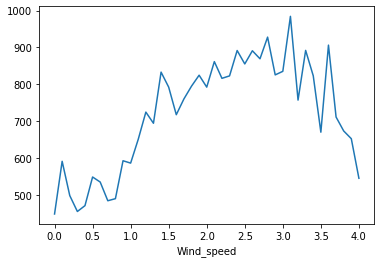

In [47]:
bike.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

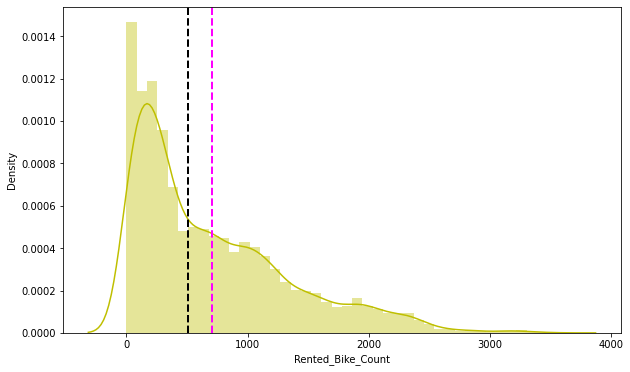

In [50]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

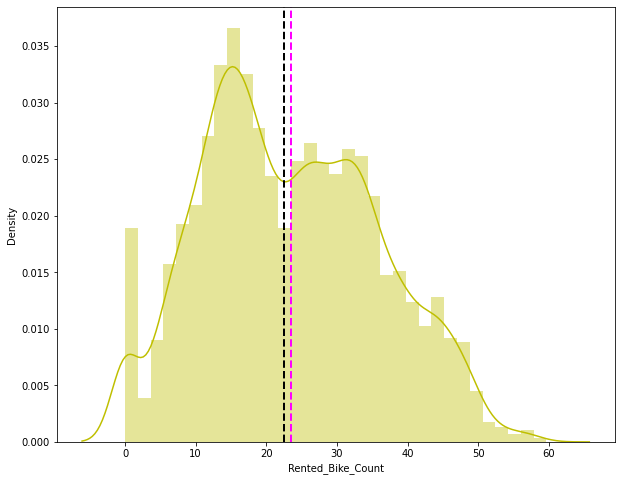

In [51]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

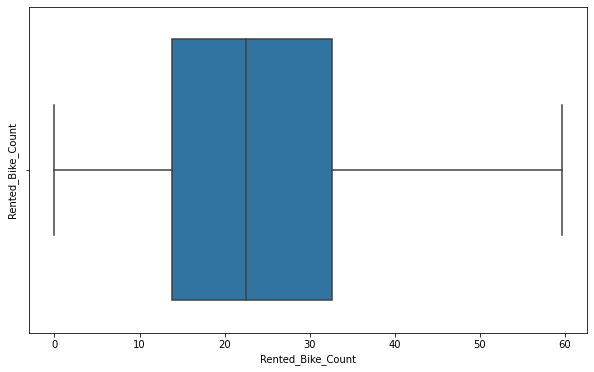

In [52]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike['Rented_Bike_Count']))
plt.show()

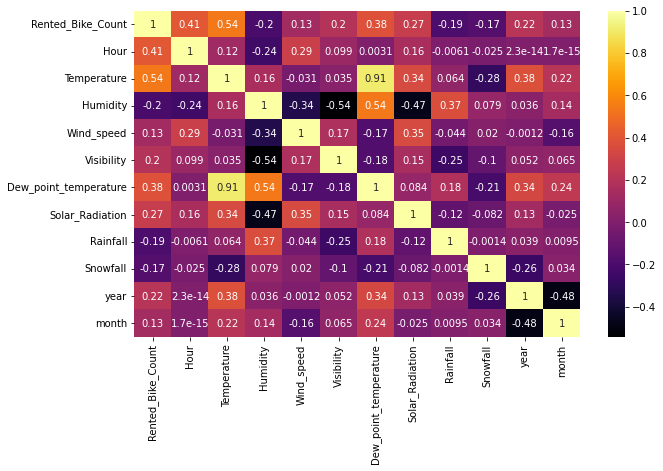

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(bike.corr(),cmap='inferno',annot=True)

In [54]:
bike=bike.drop(['Dew_point_temperature'],axis=1)

In [55]:
bike=bike.drop(['Snowfall'],axis=1)
bike=bike.drop(['Visibility'],axis=1)

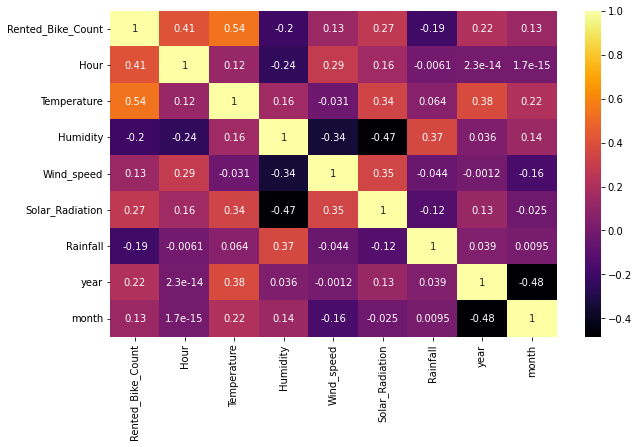

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(bike.corr(),cmap='inferno',annot=True)

In [59]:
import statsmodels.api as sm
X = bike[[ 'Temperature','Humidity',
       'Wind_speed',
       'Solar_Radiation', 'Rainfall']]
Y = bike['Rented_Bike_Count']
bike.head(10)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
5,2017-12-01,100,5,-6.4,37,1.5,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
6,2017-12-01,181,6,-6.6,35,1.3,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
7,2017-12-01,460,7,-7.4,38,0.9,0.00,0.0,Winter,No Holiday,Yes,2017,12,Friday
8,2017-12-01,930,8,-7.6,37,1.1,0.01,0.0,Winter,No Holiday,Yes,2017,12,Friday
9,2017-12-01,490,9,-6.5,27,0.5,0.23,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [60]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
0,1.0,-5.2,37,2.2,0.0,0.0
1,1.0,-5.5,38,0.8,0.0,0.0
2,1.0,-6.0,39,1.0,0.0,0.0
3,1.0,-6.2,40,0.9,0.0,0.0
4,1.0,-6.0,36,2.3,0.0,0.0
...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,0.0,0.0
8756,1.0,3.4,37,2.3,0.0,0.0
8757,1.0,2.6,39,0.3,0.0,0.0
8758,1.0,2.1,41,1.0,0.0,0.0


In [61]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1191.
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        08:19:43   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8754   BIC:                         1.337e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             742.4692     25.012     29.684      0.000     693.439     791.500
Temperature        34.5115      0.517     66.711      0.000      33.497      35.526
Humidity           -8.7791      0.347    -25.286      0.000      -9.460      -8.099
Wind_speed         62.4640      5.946     10.505      0.000      50.809      74.119
Solar_Radiation  -114.6672      9.843    -11.650      0.000    -133.961     -95.374
Rainfall         -283.5863     17.554    -16.155      0.000    -317.996    -249.176
==============================================================================
Omnibus:                      990.969   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.437
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                       4.466   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
const,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.344077,0.064129
Humidity,NaN,0.159371,1.000000,-0.341432,-0.472300,0.365359
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.348096,-0.043856
Solar_Radiation,NaN,0.344077,-0.472300,0.348096,1.000000,-0.120866
Rainfall,NaN,0.064129,0.365359,-0.043856,-0.120866,1.000000
